In [214]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import sys

%matplotlib inline

In [2]:
data = sio.loadmat("./machine-learning-ex5/ex5/ex5data1.mat");

train_X = np.array(data['X'])
train_y = np.array(data['y'])

cv_X = np.array(data['Xval'])
cv_y = np.array(data['yval'])

test_X = np.array(data['Xtest'])
test_y = np.array(data['ytest'])



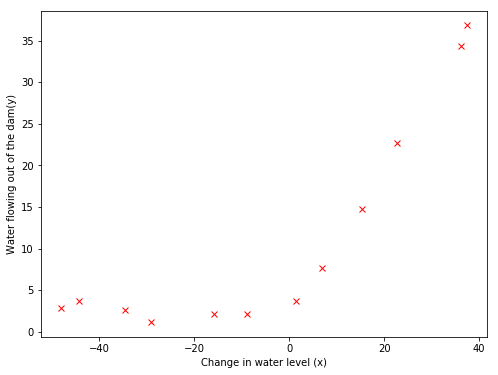

In [3]:
def showTrainingData():
    plt.figure(figsize=(8, 6))
    plt.plot(train_X, train_y, 'rx')
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water flowing out of the dam(y)')
showTrainingData()

In [4]:
def hypothesis(X, W, b):
    return np.matmul(X, W) + b

def linearRegCostFunction(X, y, W, b, _lambda=0):
    m = len(y)
    hx = hypothesis(X, W, b)
    cost = np.dot(1/(2*m), np.sum(np.square(np.subtract(hx, y)))) + np.dot(_lambda / (2*m), np.sum(np.square(W)))
    return cost

def main():
    m = len(train_X)
    n = len(train_X[0])
    
    print('train data shape:', m, n)
    
    W = np.array([[1]])
    b = 1
    cost = linearRegCostFunction(train_X, train_y, W, b, 1)
    print(cost)
    
main()

train data shape: 12 1
303.9931922202643


In [5]:
def gradientDescent(X, y, W, b, _lambda = 0, learning_rate=1, debug=0):
    m = len(y)
    hx = hypothesis(X, W, b)
    
    w_gradient = learning_rate/m * np.matmul(X.T, np.subtract(hx, y)) + (_lambda / m) * W
    b_gradient = learning_rate/m * np.sum(np.subtract(hx, y))
    W = np.subtract(W, w_gradient)
    b = np.subtract(b, b_gradient)
    
    if(debug):
        print(b_gradient, w_gradient[0][0])
    
    return W, b

def main3():
    m = len(train_X)
    n = len(train_X[0])
    
    W = np.array([[1]])
    b = 1
    W, b= gradientDescent(train_X, train_y, W, b, 1, 1, 1)
    
main3()

-15.303015674201186 598.2507441727035


(array([[0.36777479]]), 13.087162764778968)

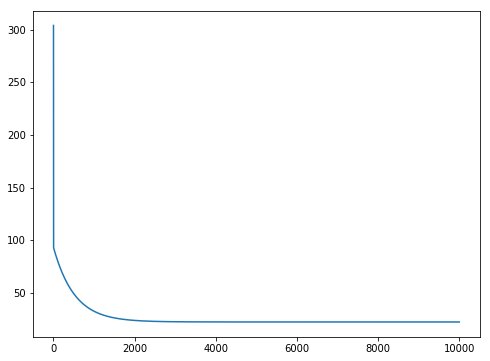

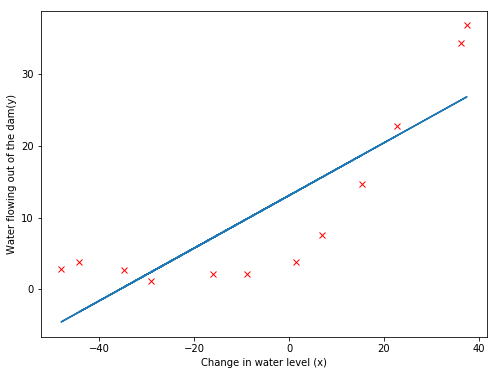

In [179]:
def showLine(x, y):
    showTrainingData()
    plt.plot(x, y, '-')
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water flowing out of the dam(y)')

def showCost(x, y):
    plt.figure(figsize=(8, 6))
    plt.plot(x, y)

def main4():
    m = len(train_X)
    n = len(train_X[0])
    
    W = np.array([[1]])
    b = 1
    
    learning_rate = 0.001
    steps = 10000
    plt_steps = np.empty(steps)
    plt_cost = np.empty(steps)
    
    for step in range(steps):
        plt_steps[step] = step
        plt_cost[step] = linearRegCostFunction(train_X, train_y, W, b)
        W, b = gradientDescent(train_X, train_y, W, b, 0, learning_rate)
    
    showCost(plt_steps, plt_cost)
    showLine(train_X, hypothesis(train_X, W, b))
    return W, b
main4()

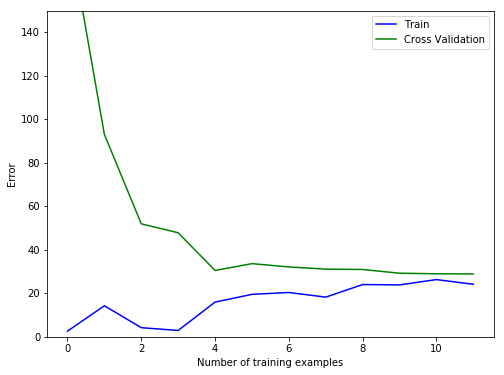

In [224]:
def showLearningCurve(x, train, cv):
    plt.figure(figsize=(8, 6))
    plt.plot(x, train, 'b-', label="Train")
    plt.plot(x, cv, 'g-', label="Cross Validation")
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.ylim(0, 150)
    plt.legend()

def main5():
    m = len(train_X)
    n = len(train_X[0])
    
    W = np.array([[1]])
    b = 15
    learning_rate = 0.001
        
    error_steps = np.empty(m)
    error_train = np.empty(m)
    error_val = np.empty(m)
    
    for i in range(m):
        W, b = gradientDescent(train_X[:i + 1], train_y[:i + 1], W, b, 0, learning_rate)
        error_steps[i] = i;
        error_train[i] = linearRegCostFunction(train_X[:i + 1], train_y[:i + 1], W, b)
        error_val[i] = linearRegCostFunction(cv_X, cv_y, W, b)
        
    showLearningCurve(error_steps, error_train, error_val)
    
main5()
    

In [156]:
def mpPoly(X):
    m = len(X)
    p = 8
    X_poly = np.empty((m, p))
    
    for i in range(m):
        X_poly[i][0] = X[i];
        for j in range(1, p):
            X_poly[i][j] = X_poly[i][0] * X_poly[i][j - 1]
    return X_poly


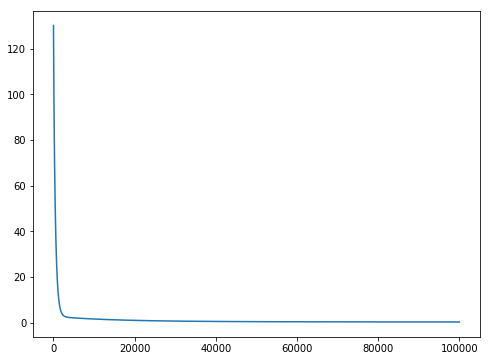

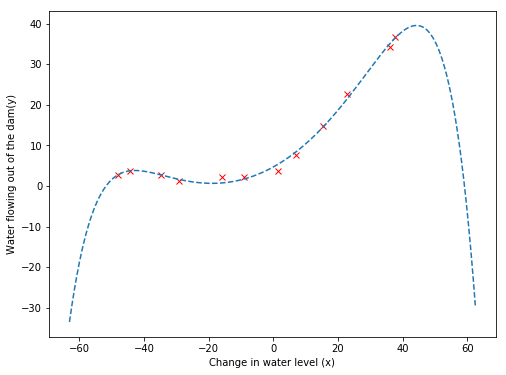

In [241]:
def featureNormalization(X):
    mu = np.mean(X, axis=0)
    sig = np.std(X, axis=0)
    X = np.divide(np.subtract(X, mu), sig)
    return X, mu, sig

def showPolyLine(minX, maxX, mu, sig, W, b):
    showTrainingData()
    x = np.arange(minX - 15, maxX + 25, 0.05)
    x = np.reshape(x, (-1, 1))
    
    X_poly = mpPoly(x)
    X_poly = np.divide(np.subtract(X_poly, mu), sig)
    
    plt.plot(x, hypothesis(X_poly, W, b), '--')
    
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water flowing out of the dam(y)')
    
def main6():
    train_X_poly = mpPoly(train_X)
    train_X_poly, mu, sig = featureNormalization(train_X_poly)
    
    m = len(train_X)
    W = np.zeros((8, 1))
    b = 1
    
    learning_rate = 0.001
    steps = 100000
    plt_steps = np.empty(steps)
    plt_cost = np.empty(steps)
    
    for step in range(steps):
        plt_steps[step] = step
        plt_cost[step] = linearRegCostFunction(train_X_poly, train_y, W, b)
        W, b = gradientDescent(train_X_poly, train_y, W, b, 0, learning_rate)
        
    showCost(plt_steps, plt_cost)
    showPolyLine(np.min(train_X), np.max(train_X), mu, sig, W, b)
    
main6()

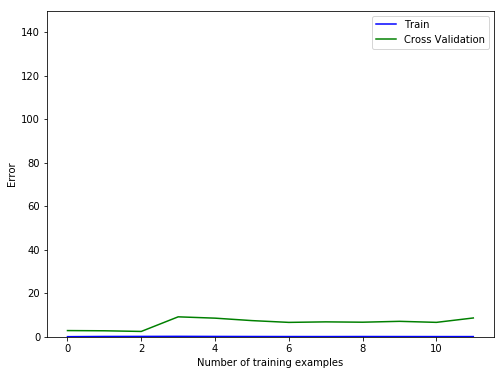

In [264]:
def main7():
    m = len(train_X)
    n = len(train_X[0])
    
    W = np.ones((8, 1))
    b = 0
    learning_rate = 0.001
    
    train_X_poly = mpPoly(train_X)
    train_X_poly, mu, sig = featureNormalization(train_X_poly)
    
    cv_X_poly = mpPoly(cv_X)
    cv_X_poly = np.divide(np.subtract(cv_X_poly, mu), sig)
        
    error_steps = np.empty(m)
    error_train = np.empty(m)
    error_val = np.empty(m)
    
    steps = 100000
    learning_rate = 0.1
    for step in range(steps):
        W, b = gradientDescent(train_X_poly, train_y, W, b, 0, learning_rate)
    
    for i in range(m):
        W, b = gradientDescent(train_X_poly[:i + 1], train_y[:i + 1], W, b, 0, learning_rate)
        error_steps[i] = i;
        error_train[i] = linearRegCostFunction(train_X_poly[:i + 1], train_y[:i + 1], W, b)
        error_val[i] = linearRegCostFunction(cv_X_poly[:i+1], cv_y[:i+1], W, b)
        
    showLearningCurve(error_steps, error_train, error_val)
    
main7()
    

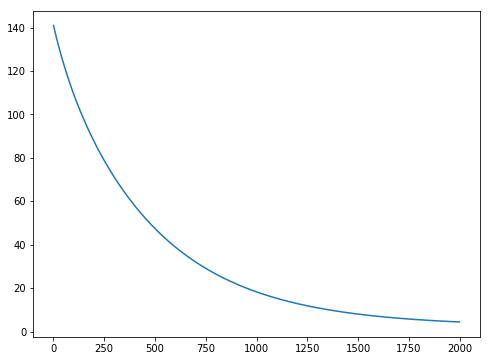

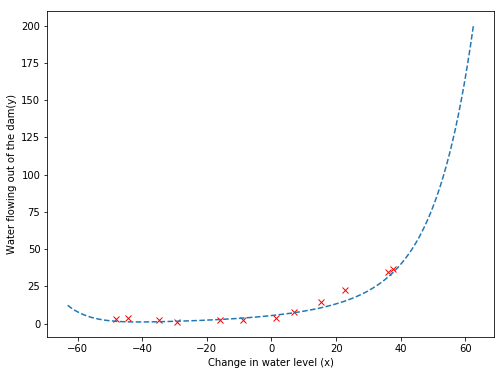

In [276]:
def main8():
    train_X_poly = mpPoly(train_X)
    train_X_poly, mu, sig = featureNormalization(train_X_poly)
    
    m = len(train_X)
    W = np.zeros((8, 1))
    b = 0
    
    learning_rate = 0.001
    steps = 2000
    plt_steps = np.empty(steps)
    plt_cost = np.empty(steps)
    
    _lambda = 0
    
    for step in range(steps):
        plt_steps[step] = step
        plt_cost[step] = linearRegCostFunction(train_X_poly, train_y, W, b)
        W, b = gradientDescent(train_X_poly, train_y, W, b, _lambda, learning_rate)
        
    showCost(plt_steps, plt_cost)
    showPolyLine(np.min(train_X), np.max(train_X), mu, sig, W, b)
    
main8()